In [8]:
from MKLpy.preprocessing import normalization, rescale_01
from sklearn.metrics.pairwise import rbf_kernel as RBF
import os
import pandas as pd
import numpy as np
import pickle as pkl
from MKLpy.metrics.pairwise.misc import homogeneous_polynomial_kernel as HPK_kernel
from sklearn.metrics import f1_score
np.seterr(divide='ignore', invalid='ignore')
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.multiclass import OneVsRestClassifier  # support from multiclass

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
from MKLpy.preprocessing import normalization, rescale_01
from MKLpy.model_selection import cross_val_score, cross_val_predict
import pickle as pkl
###


from MKLpy.metrics import pairwise
from MKLpy.algorithms import AverageMKL, EasyMKL, \
    KOMD  # KOMD is not a MKL algorithm but a simple kernel machine like the SVM
# evaluate the solution
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc



In [9]:

####


def featureCreation(idxKey, locDict):
    """ gives out clean features and labels for a given locDict and a idxKey """
    keys = list(locDict.keys())
    featuresIdxDirFileLoc = locDict[keys[idxKey]][0]
    labelsIdxDirFileLoc = locDict[keys[idxKey]][1]
    featureDate = keys[idxKey]
    ''' read the features file'''
    featuresTupleFile = pkl.load(open(featuresIdxDirFileLoc, "rb"), encoding='latin1')
    dfFeatures = pd.concat([featuresTupleFile[0], featuresTupleFile[1], \
                            featuresTupleFile[2], featuresTupleFile[3]], axis=1, sort=False).fillna(0)
    ''' read the labels file'''
    labelsDf = pd.read_csv(labelsIdxDirFileLoc)
    ''' pop the labels out'''
    labels = labelsDf['label_PrMov__window_5__thres_arbitrary__0.1']
    '''dataframe of Features and Labels - X and Y'''
    dfXY = pd.concat([dfFeatures, labels], axis=1, sort='False').dropna()
    labelName = str(dfXY.columns[dfXY.columns.str.contains(pat='label')].values[0])
    ''' drop the labels from the features'''
    dfX = dfXY.drop(columns=[labelName])
    arrX = np.array(dfX)
    ''' feature normalisation'''
    # feature scaling in [0,1] - X = rescale_01(arrX)
    X = normalization(rescale_01(arrX))
    y = dfXY[dfXY.columns[dfXY.columns.str.contains(pat='label')]].iloc[:, 0]
    ''' returns features, labels'''
    featureDate = keys[idxKey]
    return X, y, featureDate


####
extPath = '/media/ak/My Passport/Experiment Data'
featuresPath = "/".join((extPath, 'features'))
labelsPath = "/".join((extPath, 'labels'))
MKLPath = "/".join((extPath, 'MKLExpPath'))
symbols = sorted(list(set(os.listdir(featuresPath)) & set(os.listdir(labelsPath))))


In [14]:
average_kernel_results= {
    'tpr': [],
    'fpr':[],
    'auc':[],
    'train_date':[],
    'data_date': [],
    'test_recall': [],
    'train_recall': [],
    'test_accuracy' :[],
    'train_accuracy' :[],
    'thresholds' :[],
    'f1_score' :[],
}
MKL_results= {
    'tpr': [],
    'fpr':[],
    'auc':[],
    'train_date':[],
    'data_date': [],
    'test_recall': [],
    'train_recall': [],
    'test_accuracy' :[],
    'train_accuracy' :[],
    'thresholds' :[],
    'f1_score' :[],
}
if __name__ == '__main__':

    ## symbol specific
    symbolIdx = 4
    symbol = symbols[symbolIdx]
    MKLExpPath = "/".join((MKLPath, symbol, 'Experiments'))  # symbol is in symbols
    MKLSymbolPath = "/".join((MKLPath, symbol))  # symbol is in symbols
    MKLKernPath = "/".join((MKLPath, symbol, 'Kernels'))  # symbol is in symbols
    print(symbol)

    filename = "/".join((MKLSymbolPath, "LocDictsListCorrect.pkl"))
    if os.path.isfile(filename):
        HMMModelFeaturesLabelsCommon = pkl.load(open("/".join((MKLSymbolPath, "LocDictsListCorrect.pkl")), "rb"),
                                                encoding='latin1')
        count_i = 0
        for i in range(0, (len(HMMModelFeaturesLabelsCommon)-1)):
            Xtr, ytr, date_tr = featureCreation(i, HMMModelFeaturesLabelsCommon)
            print(Xtr[1])
#             Xte, yte, date_te = featureCreation(i + 1, HMMModelFeaturesLabelsCommon)
#             # appending the dates to the lists
#             average_kernel_results['data_date'].append(date_te[1])
#             average_kernel_results['train_date'].append(date_tr[1])
#             MKL_results['data_date'].append(date_te[1])
#             MKL_results['train_date'].append(date_tr[1])            
#             if (Xtr.shape[0] == ytr.shape[0]):
#                 print('Shapes Match- starting training ')
#                 ##polynomial Kernels ##
#                 try:
#                     KLtr = [pairwise.homogeneous_polynomial_kernel(Xtr, degree=d) for d in range(4)]
#                     KLte = [pairwise.homogeneous_polynomial_kernel(Xte, Xtr, degree=d) for d in range(4)]
#                     print('done')
                  
#                     clf = AverageMKL().fit(KLtr, ytr)  # a wrapper for averaging kernels
#                     print(clf.weights)  # print the weights of the combination of base kernels
#                     print('training EasyMKL...for polynomials', end='')
#                     clfEasy = EasyMKL(lam=0.1).fit(KLtr, ytr)  # combining kernels with the EasyMKL algorithm
#                     print('------')
#                     print('finished training')
#                     except:
#                         count_i += 1
#                         print(count_i)
#                         print(i, "It failed here!")

#                         continue

#                 else:
#                     print('Shapes dont match.')
#                     pass
#             try:
#                 print('Average Kernel Testing')                
#                 y_pred_te = clf.predict(KLte)  # predictions average kernel
#                 y_pred_tr = clf.predict(KLtr)
#                 y_score_te = clf.decision_function(KLte)
#                 y_score_tr = clf.decision_function(KLtr)
#                 fpr_avg, tpr_avg, thresholds_avg = roc_curve(yte.ravel(), y_score_te.ravel())
#                 y_predMKL_te = clfEasy.predict(KLte)  # predictions mkl  test
#                 y_predMKL_tr = clfEasy.predict(KLtr)  # predictions mkl  train
#                 average_kernel_results['fpr'].append(fpr_avg)
#                 average_kernel_results['tpr'].append(tpr_avg)

#                 y_scoreMKL_te = clfEasy.decision_function(KLte)  # predictions
#                 y_scoreMKL_tr = clfEasy.decision_function(KLtr)  # rank  
#                 fprMKL, tprMKL, thresholdsMKL = roc_curve(yte.ravel(), y_scoreMKL_te.ravel())
#                 MKL_results['fpr'].append(fprMKL)
#                 MKL_results['tpr'].append(tprMKL)
#                 MKL_results['f1_score'].append(f1_score(ytr, y_predMKL_tr, average='macro'))
#                 average_kernel_results['thresholds'].append(thresholds_avg) 
#                 MKL_results['thresholds'].append(thresholdsMKL) 

#                 accuracy_average = accuracy_score(yte, y_pred_te)
#                 average_kernel_results['test_accuracy'].append(accuracy_score(yte, y_pred_te))
#                 average_kernel_results['train_accuracy'].append(accuracy_score(ytr, y_pred_tr))
#                 accuracy_mkl = accuracy_score(yte, y_predMKL_te)
#                 MKL_results['train_accuracy'].append(accuracy_score(ytr, y_predMKL_tr))
#                 MKL_results['test_accuracy'].append(accuracy_score(yte, y_predMKL_te))
#                 average_kernel_results['f1_score'].append(f1_score(ytr, y_pred_tr, average='macro'))
#                 print('Accuracy of Average Kernel:', accuracy_average)
#                 print('Accuracy of MKL:', accuracy_mkl)





BARC.L
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07
 3.06972941e-02 3.80937975e-01 1.21552116e-03 7.09090454e-20
 2.89091811e-18 6.51797916e-21 1.84109740e-20 2.33155921e-19
 2.18785866e-20]
[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.46466471e-01 2.19351819e-02
 3.46673849e-01 7.70201294e-17 7.43294574e-05 3.46807642e-01
 4.82365564e-16 4.47707644e-04 3.46867826e-01 1.66958760e-16
 7.53249685e-21 7.

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.24645680e-01 3.07161763e-01 8.71125383e-02 3.24654401e-01
 2.91673359e-01 3.20762944e-01 3.25369010e-01 2.15760697e-02
 3.25087383e-01 5.64282892e-02 7.22680769e-17 2.69033595e-01
 2.24692924e-08 6.15193685e-16 1.25936068e-08 3.25369010e-01
 7.58366802e-16 3.25369010e-01 1.92473955e-05 6.79612647e-16
 7.82703161e-05]
[4.22461345e-04 2.00022212e-01 1.21759759e-03 3.36144444e-01
 3.37032402e-01 3.35097360e-01 3.37032402e-01 0.00000000e+00
 3.36806539e-01 1.47076450e-03 4.47708185e-03 3.31293696e-01
 1.72888823e-19 1.08913764e-18 2.31114734e-18 2.39011299e-01
 3.37032402e-01 3.37032402e-01 6.79548622e-16 2.32393711e-14
 5.66224226e-14]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.53481

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.13890238e-01 3.40421112e-01 0.00000000e+00 3.41963982e-01
 3.41966913e-01 3.41972714e-01 3.41560102e-01 5.45758641e-06
 3.41878889e-01 7.59335420e-17 3.41974271e-01 7.64022401e-04
 1.42067619e-14 3.41974271e-01 1.41776215e-01 2.88933153e-15
 1.00526926e-17 1.43088558e-19 1.58935251e-15 8.70752888e-19
 7.83796491e-20]
[2.19551993e-01 3.02613386e-03 5.28601984e-04 2.95118488e-01
 2.89001712e-01 1.80870778e-17 2.95184749e-01 2.89855867e-01
 2.95145335e-01 6.55507708e-17 2.95214427e-01 1.59532252e-16
 2.95214427e-01 2.95214427e-01 2.95214427e-01 2.95214427e-01
 2.46475498e-18 1.59532252e-16 2.95214427e-01 4.84210955e-10
 4.90453382e-16]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.19923746e-01 1.00018030e-01 3.83112466e-01 3.83617882e-01
 2.10320860e-01 5.21849186e-05 3.83701313e-01 2.15412003e-01
 3.83547195e-01 2.21284366e-02 3.61572876e-01 7.45928022e-15

[2.37074241e-001 7.57510464e-004 2.43991441e-001 3.80419159e-001
 3.08954255e-001 2.56186868e-001 3.79872617e-001 1.72649651e-006
 3.80328681e-001 1.20495455e-165 3.80465567e-001 2.44809671e-015
 7.21277111e-164 3.80464230e-001 1.55873754e-014 2.07911775e-176
 1.24059706e-010 6.80563991e-015 1.58690246e-168 1.97146792e-004
 2.68068974e-015]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.01812901e-01 2.95690828e-01 2.90045168e-04 2.95577026e-01
 2.87319807e-01 9.23509769e-07 7.52276169e-02 2.90664491e-01
 2.95379900e-01 0.00000000e+00 1.23121483e-04 2.95567707e-01
 2.95690828e-01 2.95690828e-01 2.95690828e-01 2.95690828e-01
 1.16100633e-04 9.43340624e-06 2.95690828e-01 2.52662781e-17
 3.25148553e-18]
[2.79798282e-02 6.39222064e-02 3.55238553e-01 3.55627573e-01
 3.31357628e-01 3.55677394e-01 3.55229535e-01 2.30013215e-02
 3.55572067e-01 7.89763524e-17 3.55677394e-01 8.35481726e-17
 8.10365609e-07 3.55677394e-01 1.30978816e-11 3.52835654e-13
 5.1

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01
 1.17351195e-13 3.24284687e-01 3.24284687e-01 6.72453041e-15
 3.19086760e-11 3.51511261e-10 1.44837803e-15 5.46113263e-19
 2.49064637e-17]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.20715737e-01 3.06900325e-01 3.27398141e-01 3.27913571e-01
 3.25697491e-01 3.27297335e-01 3.27949710e-01 4.44226169e-02
 3.27717072e-01 1.99879474e-01 3.87120165e-04 1.27683116e-01
 2.89029845e-07 1.91611045e-10 1.02120188e-07 2.70662042e-01
 4.45261751e-04 1.69110681e-01 1.33746177e-13 3.30394750e-16
 5.37190161e-13]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.33036637e-02 3.64242825e-04 3.36361467e-01 3.34842203e-01
 3.36361467e-01 3.34464112e-01 3.3

[1.82132663e-004 2.69223099e-001 6.34100206e-004 3.58927482e-001
 3.58417032e-001 3.58684007e-001 3.58932005e-001 5.25894811e-004
 3.58621355e-001 3.58932005e-001 4.10664065e-300 7.93185885e-004
 1.40568930e-017 1.89745533e-315 3.24125446e-019 3.58932005e-001
 1.55569763e-297 1.62683215e-001 1.19228959e-018 1.86780510e-316
 1.10476531e-019]
[2.95295018e-01 3.20529196e-01 2.39014184e-03 3.20619864e-01
 3.01040039e-01 0.00000000e+00 3.07729050e-01 2.99484565e-01
 3.20494234e-01 2.97455279e-01 2.17532017e-02 2.28927292e-02
 4.23998585e-18 1.34522618e-18 6.74497955e-19 3.93733631e-12
 8.61676302e-11 1.37746418e-12 3.20849065e-01 3.20849065e-01
 1.84835273e-01]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.24645680e-01 3.07161763e-01 8.71125383e-02 3.24654401e-01
 2.91673359e-01 3.20762944e-01 3.25369010e-01 2.15760697e-02
 3.25087383e-01 5.64282892e-02 7.226807

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07
 3.06972941e-02 3.80937975e-01 1.21552116e-03 7.09090454e-20
 2.89091811e-18 6.51797916e-21 1.84109740e-20 2.33155921e-19
 2.18785866e-20]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.4

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.74946845e-01 6.55758687e-02 2.77190858e-01 2.77446267e-01
 2.71835031e-01 2.77502024e-01 2.76348181e-01 6.20714235e-03
 2.77380441e-01 0.00000000e+00 1.36111826e-16 2.77502024e-01
 2.77502024e-01 2.77502024e-01 2.77502024e-01 2.77502024e-01
 2.33734775e-16 4.26358913e-04 2.77502024e-01 1.48244727e-16
 9.53118541e-15]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.87216120e-03 3.86877702e-01 1.16714835e-02 4.12119322e-01
 1.69724667e-03 0.00000000e+00 4.12476000e-01 3.21890399e-03
 4.12166048e-01 4.12493347e-01 4.04800884e-16 9.16260574e-17
 3.27410256e-14 1.08769890e-29 1.41140392e-16 1.53673622e-04

[2.16674724e-001 5.83955320e-005 3.24985826e-001 3.25098100e-001
 3.99276940e-018 0.00000000e+000 3.25117687e-001 1.35336157e-017
 3.25086572e-001 3.25186912e-001 0.00000000e+000 1.68407637e-216
 2.49989148e-016 3.25186912e-001 2.64070381e-231 3.25186912e-001
 3.25186912e-001 4.31636252e-215 4.03989000e-002 3.25186912e-001
 1.68407637e-216]
[2.77578844e-01 1.52679257e-01 2.72630707e-04 3.35671969e-01
 3.34165290e-01 1.42327025e-06 3.35315997e-01 3.34116343e-01
 3.35608320e-01 8.36394559e-04 3.35458239e-01 1.32468260e-22
 1.45965353e-03 2.46166754e-02 5.77067493e-17 3.74622753e-19
 1.01743475e-17 1.56755592e-32 3.35747159e-01 3.35747159e-01
 1.08268437e-08]
[6.02454852e-04 1.83577372e-01 1.22559818e-02 3.75276670e-01
 3.75063408e-01 0.00000000e+00 3.75325007e-01 3.75050730e-01
 3.74979630e-01 3.42391062e-01 2.20176599e-02 3.68931121e-02
 6.74311360e-03 4.53602905e-04 6.20459877e-04 1.29420073e-07
 1.15996892e-08 1.13758434e-08 3.75325007e-01 2.47452285e-02
 4.35572899e-02]
[nan nan nan 

[7.92226960e-05 2.83478370e-01 0.00000000e+00 3.54086787e-01
 3.54144807e-01 2.74725527e-19 3.54127347e-01 3.54144807e-01
 3.54014188e-01 1.50810836e-12 7.86366653e-17 3.54144807e-01
 1.54005588e-09 1.72049275e-12 2.04587768e-01 6.15199098e-12
 2.52798790e-16 3.54144807e-01 1.50810835e-12 1.50773852e-16
 5.06331839e-18]
[3.38883966e-01 6.49436322e-03 1.54898391e-01 3.63790761e-01
 3.62893823e-01 3.63783408e-01 3.63519773e-01 5.27954160e-04
 3.63698222e-01 3.13230961e-01 6.54307203e-03 4.40581338e-02
 3.13229481e-01 6.54300559e-03 4.55145259e-02 4.54494928e-07
 2.98239401e-08 6.08986891e-08 1.04317750e-06 3.68626259e-08
 3.50780715e-07]
[2.99365268e-04 3.27825067e-01 2.20822538e-04 3.47593038e-01
 3.47516128e-01 3.47023656e-01 3.47549745e-01 1.85912111e-03
 3.47457200e-01 2.60732223e-01 9.63255485e-06 8.69427386e-02
 5.07180657e-16 7.75474733e-20 2.20133233e-16 1.79748315e-18
 8.33531245e-21 1.15440038e-18 3.47652075e-01 9.53075085e-05
 3.04292122e-01]
[nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.95075851e-01 3.09105152e-01 3.56416678e-04 3.41012349e-01
 3.41871882e-01 3.41139128e-01 3.41867287e-01 3.52871691e-04
 3.42007515e-01 1.02732861e-04 3.42026719e-01 7.59565556e-17
 6.10088346e-21 1.91539086e-18 3.79284732e-16 5.54949641e-20
 2.45766901e-16 4.14873251e-16 5.61709585e-04 3.42077916e-01
 1.90193089e-15]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17
 1.04677909e-06 3.42009809e-01 5.65548695e-11 4.12448697e-11
 9.69458638e-18 2.9419803

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.95075851e-01 3.09105152e-01 3.56416678e-04 3.41012349e-01
 3.41871882e-01 3.41139128e-01 3.41867287e-01 3.52871691e-04
 3.42007515e-01 1.02732861e-04 3.42026719e-01 7.59565556e-17
 6.10088346e-21 1.91539086e-18 3.79284732e-16 5.54949641e-20
 2.45766901e-16 4.14873251e-16 5.61709585e-04 3.42077916e-01
 1.90193089e-15]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17
 1.04677909e-06 3.42009809e-01 5.65548695e-11 4.12448697e-11
 9.69458638e-18 2.9419803

[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17
 1.04677909e-06 3.42009809e-01 5.65548695e-11 4.12448697e-11
 9.69458638e-18 2.94198035e-16 1.41928300e-10 3.42009809e-01
 8.86221776e-16]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01

[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17
 1.04677909e-06 3.42009809e-01 5.65548695e-11 4.12448697e-11
 9.69458638e-18 2.94198035e-16 1.41928300e-10 3.42009809e-01
 8.86221776e-16]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01
 1.17351195e-13 3.24284687e-01 3.24284687e-01 6.72453041e-15
 3.19086760e-11 3.51511261e-10 1.44837803e-15 5.46113263e-19
 2.49064637e-17]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.20715737e-01 3.06900325e-01 3.27398141e-01 3.27913571e-01
 3.25697491e-01 3.27297335e-01 3.2

[4.22461345e-04 2.00022212e-01 1.21759759e-03 3.36144444e-01
 3.37032402e-01 3.35097360e-01 3.37032402e-01 0.00000000e+00
 3.36806539e-01 1.47076450e-03 4.47708185e-03 3.31293696e-01
 1.72888823e-19 1.08913764e-18 2.31114734e-18 2.39011299e-01
 3.37032402e-01 3.37032402e-01 6.79548622e-16 2.32393711e-14
 5.66224226e-14]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.53481475e-01 1.76325615e-02 9.48860066e-03 3.72294318e-01
 3.73882344e-01 3.72511340e-01 3.73640875e-01 1.19487986e-04
 3.73797207e-01 5.77709854e-05 3.73853783e-01 8.30185990e-17
 7.35963304e-19 1.77152992e-16 1.30090506e-16 2.35442680e-17
 8.57282101e-14 1.56456334e-16 2.44346359e-04 3.73882531e-01
 2.78356654e-16]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.95075851e-01 3.09105152e-01 3.56416678e-04 3.41012349e-01
 3.41871882e-01 3.41139128e-01 3.41867287e-01 3.52871691e-04
 3.42007515e-01 1.02732861e-04 3.42026719e-01 7.59565556e-17

[7.38042946e-02 3.18985131e-01 2.41664971e-04 3.35881146e-01
 3.35889528e-01 3.35850294e-01 3.35889528e-01 1.83938266e-04
 3.35729872e-01 3.77464217e-02 2.98473916e-01 6.04945714e-04
 3.35889528e-01 3.35889528e-01 1.12588948e-01 7.70693373e-18
 8.75908358e-18 1.13138294e-19 7.54673441e-19 7.66095235e-19
 6.20602651e-20]
[1.82132663e-004 2.69223099e-001 6.34100206e-004 3.58927482e-001
 3.58417032e-001 3.58684007e-001 3.58932005e-001 5.25894811e-004
 3.58621355e-001 3.58932005e-001 4.10664065e-300 7.93185885e-004
 1.40568930e-017 1.89745533e-315 3.24125446e-019 3.58932005e-001
 1.55569763e-297 1.62683215e-001 1.19228959e-018 1.86780510e-316
 1.10476531e-019]
[2.95295018e-01 3.20529196e-01 2.39014184e-03 3.20619864e-01
 3.01040039e-01 0.00000000e+00 3.07729050e-01 2.99484565e-01
 3.20494234e-01 2.97455279e-01 2.17532017e-02 2.28927292e-02
 4.23998585e-18 1.34522618e-18 6.74497955e-19 3.93733631e-12
 8.61676302e-11 1.37746418e-12 3.20849065e-01 3.20849065e-01
 1.84835273e-01]
[nan nan nan 

[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07
 3.06972941e-02 3.80937975e-01 1.21552116e-03 7.09090454e-20
 2.89091811e-18 6.51797916e-21 1.84109740e-20 2.33155921e-19
 2.18785866e-20]
[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.46466471e-01 2.19351819e-02
 3.46673849e-01 7.70201294e-17 7.43294574e-05 3.46807642e-01
 4.82365564e-16 4.47707644e-04 3.46867826e-01 1.66958760e-16
 7.53249685e-21 7.29484028e-19 2.55303175e-16 1.92990818e-17
 5.21603919e-14]
[7.38042946e-02 3.18985131e-01 2.41664971e-04 3.35881146e-01
 3.35889528e-01 3.35850294e-01 3.35889528e-01 1.83938266e-04
 3.35729872e-01 3.77464217e-02 2.98473916e-01 6.04945714e-04
 3.35889528e-01 3.35889528e-01 1.12588948e-01 7.70693373e-18
 8.75908358e-18 1.13138294e-19 7.54673441e-19 7.66095235e-19
 6.20602651e-20]
[1.82132663e-004 2.69223099e-001 6

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07
 3.06972941e-02 3.80937975e-01 1.21552116e-03 7.09090454e-20
 2.89091811e-18 6.51797916e-21 1.84109740e-20 2.33155921e-19
 2.18785866e-20]
[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.46466471e-01 2.19351819e-02
 3.46673849e-01 7.70201294e-17 7.43294574e-05 3.46807642e-01

[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.43601758e-01 2.81708867e-01
 3.43592693e-01 7.63095727e-17 3.43225532e-01 7.41962160e-04
 1.02241534e-16 3.43667763e-01 9.47227751e-04 9.30526671e-17
 6.31826128e-11 9.62040164e-14 9.69654584e-17 5.10488771e-10
 6.87941513e-12]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07
 3.06972941e-02 3.80937975e-01 1.21552116e-03 7.09090454e-20
 2.89091811e-18 6.51797916e-21 1.84109740e-20 2.33155921e-19
 2.18785866e-20]
[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.46466471e-01 2.19351819e-02
 3.46673849e-01 7.70201294e-17 7.43294574e-05 3.46807642e-01
 4.82365564e-16 4.47707644e-04 3.46867826e-01 1.66958760e-16
 7.53249685e-21 7.2948402

[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.43601758e-01 2.81708867e-01
 3.43592693e-01 7.63095727e-17 3.43225532e-01 7.41962160e-04
 1.02241534e-16 3.43667763e-01 9.47227751e-04 9.30526671e-17
 6.31826128e-11 9.62040164e-14 9.69654584e-17 5.10488771e-10
 6.87941513e-12]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.47439810e-03 1.32789472e-01 3.50112711e-01 3.51622582e-01
 3.31590199e-04 3.51403180e-01 3.51572990e-01 3.51370511e-01
 3.51525940e-01 3.43737225e-01 7.80888858e-17 7.94384642e-03
 5.12207115e-09 1.05838539e-16 1.18631116e-10 3.51681071e-01
 1.08800509e-16 1.13963186e-02 1.36626607e-10 1.00581628e-16
 6.49513637e-12]
[7.21160316e-03 0.00000000e+00 1.59558833e-03 3.80862530e-01
 3.80937975e-01 1.31845276e-04 3.80937975e-01 3.80385567e-01
 3.80641361e-01 2.24883218e-02 3.58493222e-01 3.43164134e-07
 3.06972941e-02 3.80937975e-01 1.21552116e-03 7.09090454e-20
 2.89091811e-18 6.51797916e-21 1.84109740e-20 2.33155921e-19
 2.18785866e-20]
[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.46466471e-01 2.19351819e-02
 3.46673849e-01 7.70201294e-17 7.43294574e-05 3.46807642e-01
 4.82365564e-16 4.47707644e-04 3.46867826e-01 1.66958760e-16
 7.53249685e-21 7.2948402

[1.82132663e-004 2.69223099e-001 6.34100206e-004 3.58927482e-001
 3.58417032e-001 3.58684007e-001 3.58932005e-001 5.25894811e-004
 3.58621355e-001 3.58932005e-001 4.10664065e-300 7.93185885e-004
 1.40568930e-017 1.89745533e-315 3.24125446e-019 3.58932005e-001
 1.55569763e-297 1.62683215e-001 1.19228959e-018 1.86780510e-316
 1.10476531e-019]
[2.95295018e-01 3.20529196e-01 2.39014184e-03 3.20619864e-01
 3.01040039e-01 0.00000000e+00 3.07729050e-01 2.99484565e-01
 3.20494234e-01 2.97455279e-01 2.17532017e-02 2.28927292e-02
 4.23998585e-18 1.34522618e-18 6.74497955e-19 3.93733631e-12
 8.61676302e-11 1.37746418e-12 3.20849065e-01 3.20849065e-01
 1.84835273e-01]
[3.24645680e-01 3.07161763e-01 8.71125383e-02 3.24654401e-01
 2.91673359e-01 3.20762944e-01 3.25369010e-01 2.15760697e-02
 3.25087383e-01 5.64282892e-02 7.22680769e-17 2.69033595e-01
 2.24692924e-08 6.15193685e-16 1.25936068e-08 3.25369010e-01
 7.58366802e-16 3.25369010e-01 1.92473955e-05 6.79612647e-16
 7.82703161e-05]
[4.22461345e-

[1.53481475e-01 1.76325615e-02 9.48860066e-03 3.72294318e-01
 3.73882344e-01 3.72511340e-01 3.73640875e-01 1.19487986e-04
 3.73797207e-01 5.77709854e-05 3.73853783e-01 8.30185990e-17
 7.35963304e-19 1.77152992e-16 1.30090506e-16 2.35442680e-17
 8.57282101e-14 1.56456334e-16 2.44346359e-04 3.73882531e-01
 2.78356654e-16]
[2.95075851e-01 3.09105152e-01 3.56416678e-04 3.41012349e-01
 3.41871882e-01 3.41139128e-01 3.41867287e-01 3.52871691e-04
 3.42007515e-01 1.02732861e-04 3.42026719e-01 7.59565556e-17
 6.10088346e-21 1.91539086e-18 3.79284732e-16 5.54949641e-20
 2.45766901e-16 4.14873251e-16 5.61709585e-04 3.42077916e-01
 1.90193089e-15]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[3.42009809e-01 3.42009809e-01 1.9

[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01
 1.17351195e-13 3.24284687e-01 3.24284687e-01 6.72453041e-15
 3.19086760e-11 3.51511261e-10 1.44837803e-15 5.46113263e-19
 2.49064637e-17]
[3.20715737e-01 3.06900325e-01 3.27398141e-01 3.27913571e-01
 3.25697491e-01 3.27297335e-01 3.27949710e-01 4.44226169e-02
 3.27717072e-01 1.99879474e-01 3.87120165e-04 1.27683116e-01
 2.89029845e-07 1.91611045e-10 1.02120188e-07 2.70662042e-01
 4.45261751e-04 1.69110681e-01 1.33746177e-13 3.30394750e-16
 5.37190161e-13]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.38883966e-01 6.49436322e-03 1.54898391e-01 3.63790761e-01
 3.62893823e-01 3.63783408e-01 3.63519773e-01 5.27954160e-04
 3.63698222e-01 3.13230961e-01 6.54307203e-03 4.40581338e-02
 3.13229481e-01 6.54300559e-03 4.55145259e-02 4.54494928e-07
 2.98239401e-08 6.0898689

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.77578844e-01 1.52679257e-01 2.72630707e-04 3.35671969e-01
 3.34165290e-01 1.42327025e-06 3.35315997e-01 3.34116343e-01
 3.35608320e-01 8.36394559e-04 3.35458239e-01 1.32468260e-22
 1.45965353e-03 2.46166754e-02 5.77067493e-17 3.74622753e-19
 1.01743475e-17 1.56755592e-32 3.35747159e-01 3.35747159e-01
 1.08268437e-08]
[6.02454852e-04 1.83577372e-01 1.22559818e-02 3.75276670e-01
 3.75063408e-01 0.00000000e+00 3.75325007e-01 3.75050730e-01
 3.74979630e-01 3.42391062e-01 2.20176599e-02 3.68931121e-02
 6.74311360e-03 4.53602905e-04 6.20459877e-04 1.29420073e-07
 1.15996892e-08 1.13758434e-08 3.75325007e-01 2.47452285e-02
 4.35572899e-02]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.87216120e-03 3.86877702e-01 1.16714835e-02 4.12119322e-01
 1.69724667e-03 0.00000000e+00 4.12476000e-01 3.21890399e-03
 4.12166048e-01 4.12493347e-01 4.04800884e-16 9.16260574e-17
 3.27410256e-14 1.08769890e-29 1.41140392e-16 1.53673622e-04
 2.39418656e-19 2.81980792e-16 4.12493347e-01 5.83597285e-16
 1.73380735e-16]
[2.13890238e-01 3.40421112e-01 0.00000000e+00 3.41963982e-01
 3.41966913e-01 3.41972714e-01 3.41560102e-01 5.45758641e-06
 3.41878889e-01 7.59335420e-17 3.41974271e-01 7.64022401e-04
 1.42067619e-14 3.41974271e-01 1.41776215e-01 2.88933153e-15
 1.00526926e-17 1.43088558e-19 1.58935251e-15 8.70752888e-19
 7.83796491e-20]
[2.19551993e-01 3.02613386e-03 5.28601984e-04 2.95118488e-01
 2.89001712e-01 1.80870778e-17 2.95184749e-01 2.89855867e-01
 2.95145335e-01 6.55507708e-17 2.95214427e-01 1.59532252e-16

[3.44404358e-01 1.84514393e-01 7.18830637e-02 3.46847326e-01
 3.46866188e-01 3.46781951e-01 3.46466471e-01 2.19351819e-02
 3.46673849e-01 7.70201294e-17 7.43294574e-05 3.46807642e-01
 4.82365564e-16 4.47707644e-04 3.46867826e-01 1.66958760e-16
 7.53249685e-21 7.29484028e-19 2.55303175e-16 1.92990818e-17
 5.21603919e-14]
[7.38042946e-02 3.18985131e-01 2.41664971e-04 3.35881146e-01
 3.35889528e-01 3.35850294e-01 3.35889528e-01 1.83938266e-04
 3.35729872e-01 3.77464217e-02 2.98473916e-01 6.04945714e-04
 3.35889528e-01 3.35889528e-01 1.12588948e-01 7.70693373e-18
 8.75908358e-18 1.13138294e-19 7.54673441e-19 7.66095235e-19
 6.20602651e-20]
[1.82132663e-004 2.69223099e-001 6.34100206e-004 3.58927482e-001
 3.58417032e-001 3.58684007e-001 3.58932005e-001 5.25894811e-004
 3.58621355e-001 3.58932005e-001 4.10664065e-300 7.93185885e-004
 1.40568930e-017 1.89745533e-315 3.24125446e-019 3.58932005e-001
 1.55569763e-297 1.62683215e-001 1.19228959e-018 1.86780510e-316
 1.10476531e-019]
[2.95295018e-

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01
 1.17351195e-13 3.24284687e-01 3.24284687e-01 6.72453041e-15
 3.19086760e-11 3.51511261e-10 1.44837803e-15 5.46113263e-19
 2.49064637e-17]
[3.20715737e-01 3.06900325e-01 3.27398141e-01 3.27913571e-01
 3.25697491e-01 3.27297335e-01 3.27949710e-01 4.44226169e-02
 3.27717072e-01 1.99879474e-01 3.87120165e-04 1.27683116e-01
 2.89029845e-07 1.91611045e-10 1.02120188e-07 2.70662042e-01
 4.45261751e-04 1.69110681e-01 1.33746177e-13 3.30394750e-16
 5.37190161e-13]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.38883966e-01 6.49436322e-03 1.54898391e-01 3.63790761e-01
 3.62893823e-01 3.63783408e-01 3.63519773e-01 5.27954160e-04
 3.63698222e-01 3.13230961e-01 6.54307203e-03 4.40581338e-02

[3.87216120e-03 3.86877702e-01 1.16714835e-02 4.12119322e-01
 1.69724667e-03 0.00000000e+00 4.12476000e-01 3.21890399e-03
 4.12166048e-01 4.12493347e-01 4.04800884e-16 9.16260574e-17
 3.27410256e-14 1.08769890e-29 1.41140392e-16 1.53673622e-04
 2.39418656e-19 2.81980792e-16 4.12493347e-01 5.83597285e-16
 1.73380735e-16]
[2.19551993e-01 3.02613386e-03 5.28601984e-04 2.95118488e-01
 2.89001712e-01 1.80870778e-17 2.95184749e-01 2.89855867e-01
 2.95145335e-01 6.55507708e-17 2.95214427e-01 1.59532252e-16
 2.95214427e-01 2.95214427e-01 2.95214427e-01 2.95214427e-01
 2.46475498e-18 1.59532252e-16 2.95214427e-01 4.84210955e-10
 4.90453382e-16]
[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.43601758e-01 2.81708867e-01
 3.43592693e-01 7.63095727e-17 3.43225532e-01 7.41962160e-04
 1.02241534e-16 3.43667763e-01 9.47227751e-04 9.30526671e-17
 6.31826128e-11 9.62040164e-14 9.69654584e-17 5.10488771e-10
 6.87941513e-12]
[nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01
 1.17351195e-13 3.24284687e-01 3.24284687e-01 6.72453041e-15
 3.19086760e-11 3.51511261e-10 1.44837803e-15 5.46113263e-19
 2.49064637e-17]
[3.20715737e-01 3.06900325e-01 3.27398141e-01 3.27913571e-01
 3.25697491e-01 3.27297335e-01 3.27949710e-01 4.44226169e-02
 3.27717072e-01 1.99879474e-01 3.87120165e-04 1.27683116e-01
 2.89029845e-07 1.91611045e-10 1.02120188e-07 2.70662042e-01
 4.45261751e-04 1.69110681e-01 1.33746177e-13 3.30394750e-16
 5.37190161e-13]
[3.38883966e-01 6.49436322e-03 1.54898391e-01 3.63790761e-01
 3.62893823e-01 3.63783408e-01 3.63519773e-01 5.27954160e-04
 3.63698222e-01 3.13230961e-01 6.54307203e-03 4.40581338e-02
 3.13229481e-01 6.54300559e-03 4.55145259e-02 4.54494928e-07
 2.98239401e-08 6.0898689

[1.82132663e-004 2.69223099e-001 6.34100206e-004 3.58927482e-001
 3.58417032e-001 3.58684007e-001 3.58932005e-001 5.25894811e-004
 3.58621355e-001 3.58932005e-001 4.10664065e-300 7.93185885e-004
 1.40568930e-017 1.89745533e-315 3.24125446e-019 3.58932005e-001
 1.55569763e-297 1.62683215e-001 1.19228959e-018 1.86780510e-316
 1.10476531e-019]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.53481475e-01 1.76325615e-02 9.48860066e-03 3.72294318e-01
 3.73882344e-01 3.72511340e-01 3.73640875e-01 1.19487986e-04
 3.73797207e-01 5.77709854e-05 3.73853783e-01 8.30185990e-17
 7.35963304e-19 1.77152992e-16 1.30090506e-16 2.35442680e-17
 8.57282101e-14 1.56456334e-16 2.44346359e-04 3.73882531e-01
 2.78356654e-16]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.5

[2.19551993e-01 3.02613386e-03 5.28601984e-04 2.95118488e-01
 2.89001712e-01 1.80870778e-17 2.95184749e-01 2.89855867e-01
 2.95145335e-01 6.55507708e-17 2.95214427e-01 1.59532252e-16
 2.95214427e-01 2.95214427e-01 2.95214427e-01 2.95214427e-01
 2.46475498e-18 1.59532252e-16 2.95214427e-01 4.84210955e-10
 4.90453382e-16]
[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.43601758e-01 2.81708867e-01
 3.43592693e-01 7.63095727e-17 3.43225532e-01 7.41962160e-04
 1.02241534e-16 3.43667763e-01 9.47227751e-04 9.30526671e-17
 6.31826128e-11 9.62040164e-14 9.69654584e-17 5.10488771e-10
 6.87941513e-12]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[1.53481475e-01 1.76325615e-02 9.48860066e-03 3.72294318e-01
 3.73882344e-01 3.72511340e-01 3.73640875e-01 1.19487986e-04
 3.73797207e-01 5.77709854e-05 3.73853783e-01 8.30185990e-17
 7.35963304e-19 1.77152992e-16 1.30090506e-16 2.35442680e-17
 8.57282101e-14 1.56456334e-16 2.44346359e-04 3.73882531e-01
 2.78356654e-16]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[2.77578844e-01 1.52679257e-01 2.72630707e-04 3.35671969e-01
 3.34165290e-01 1.42327025e-06 3.35315997e-01 3.34116343e-01
 3.35608320e-01 8.36394559e-04 3.35458239e-01 1.32468260e-22
 1.45965353e-03 2.46166754e-02 5.77067493e-17 3.74622753e-19
 1.01743475e-17 1.56755592e-32 3.35747159e-01 3.35747159e-01
 1.08268437e-08]
[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.4

[3.87216120e-03 3.86877702e-01 1.16714835e-02 4.12119322e-01
 1.69724667e-03 0.00000000e+00 4.12476000e-01 3.21890399e-03
 4.12166048e-01 4.12493347e-01 4.04800884e-16 9.16260574e-17
 3.27410256e-14 1.08769890e-29 1.41140392e-16 1.53673622e-04
 2.39418656e-19 2.81980792e-16 4.12493347e-01 5.83597285e-16
 1.73380735e-16]
[3.39196188e-03 3.16574758e-01 3.22564489e-01 3.23953379e-01
 3.23689232e-01 3.23604739e-01 3.24271716e-01 5.93888861e-04
 3.24001275e-01 7.20056653e-17 9.79995733e-02 2.26331997e-01
 1.17351195e-13 3.24284687e-01 3.24284687e-01 6.72453041e-15
 3.19086760e-11 3.51511261e-10 1.44837803e-15 5.46113263e-19
 2.49064637e-17]
[2.19551993e-01 3.02613386e-03 5.28601984e-04 2.95118488e-01
 2.89001712e-01 1.80870778e-17 2.95184749e-01 2.89855867e-01
 2.95145335e-01 6.55507708e-17 2.95214427e-01 1.59532252e-16
 2.95214427e-01 2.95214427e-01 2.95214427e-01 2.95214427e-01
 2.46475498e-18 1.59532252e-16 2.95214427e-01 4.84210955e-10
 4.90453382e-16]
[nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.43601758e-01 2.81708867e-01
 3.43592693e-01 7.63095727e-17 3.43225532e-01 7.41962160e-04
 1.02241534e-16 3.43667763e-01 9.47227751e-04 9.30526671e-17
 6.31826128e-11 9.62040164e-14 9.69654584e-17 5.10488771e-10
 6.87941513e-12]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.0

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[6.45585481e-02 3.01449139e-01 5.22533625e-04 3.43624188e-01
 3.42714772e-01 3.43567465e-01 3.43601758e-01 2.81708867e-01
 3.43592693e-01 7.63095727e-17 3.43225532e-01 7.41962160e-04
 1.02241534e-16 3.43667763e-01 9.47227751e-04 9.30526671e-17
 6.31826128e-11 9.62040164e-14 9.69654584e-17 5.10488771e-10
 6.87941513e-12]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[4.66984221e-03 6.91776085e-04 3.54272382e-01 3.52072583e-01
 3.54588264e-01 0.00000000e+00 3.54588264e-01 3.54588264e-01
 3.54353660e-01 5.47233485e-03 7.87344138e-17 3.49207265e-01
 4.29737035e-12 1.03611489e-16 5.32801714e-12 6.33761677e-03
 8.58331008e-17 3.54588264e-01 2.47407981e-10 8.79493854e-17
 1.26140458e-08]
[3.42009809e-01 3.42009809e-01 1.91664544e-02 3.41889070e-01
 2.64489506e-01 1.55460604e-16 2.01456342e-01 2.65667132e-01
 3.41720033e-01 1.15506502e-12 3.42009809e-01 7.59464262e-17
 1.04677909e-06 3.42009809e-01 5.65548695e-11 4.12448697e-11
 9.69458638e-18 2.94198035e-16 1.41928300e-10 3.42009809e-01
 8.86221776e-16]
[2.19551993e-01 3.02613386e-03 5.28601984e-04 2.95118488e-01
 2.89001712e-01 1.80870778e-17 2.95184749e-01 2.89855867e-01
 2.95145335e-01 6.55507708e-17 2.95214427e-01 1.59532252e-16

In [ ]:
    # #evaluate the solution
# from sklearn.metrics import accuracy_score, roc_auc_score
# y_pred = clf.predict(KLte)					#predictions
# y_score = clf.decision_function(KLte)		#rank
# accuracy = accuracy_score(Yte, y_pred)
# roc_auc = roc_auc_score(Yte, y_score)
# print ('Accuracy score: %.3f, roc AUC score: %.3f' % (accuracy, roc_auc))
    

In [ ]:
fileNameAVG = "".join((str(symbol),"_one_day_ahead_average_kernel_results.pkl"))
fileNameMKL = "".join((str(symbol),"_one_day_ahead_multiple_kernel_results.pkl"))
# pkl.dump(MKL_results,open(fileNameMKL), "wb")
pkl.dump(MKL_results, open("/".join((MKLSymbolPath, fileNameMKL)), "wb"))
pkl.dump(average_kernel_results, open("/".join((MKLSymbolPath, fileNameAVG)), "wb"))
# pkl.dump(average_kernel_results,open("/".join((MKLSymbolPath, "LocDictsListCorrect.pkl")), "wb"))

In [18]:
os.listdir(MKLSymbolPath)

['BARC.L_one_day_ahead_average_kernel_results.pkl',
 'BARC.L_one_day_ahead_multiple_kernel_results.pkl',
 'CommonLocationsDicts.pkl',
 'Experiments',
 'Kernels',
 'LocDictsListCorrect.pkl']

In [ ]:
MKLSymbolPath

In [15]:
test_accuracy=np.asarray(average_kernel_results['test_accuracy'])
train_accuracy=np.asarray(average_kernel_results['train_accuracy'])

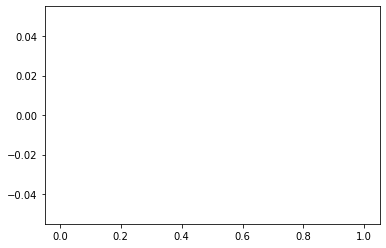

In [16]:
_=plt.hist(test_accuracy)
_=plt.hist(train_accuracy,color='r')


In [ ]:
print(np.median(test_accuracy), np.median(train_accuracy))

In [7]:
len(HMMModelFeaturesLabelsCommon)

NameError: name 'HMMModelFeaturesLabelsCommon' is not defined